# Run a per-condition CCA analysis

In [113]:
import numpy as np
from mindaffectBCI.decoder.offline.load_mindaffectBCI import load_mindaffectBCI, find_target_obj
from mindaffectBCI.decoder.offline import load_calibration_data
from mindaffectBCI.decoder.updateSummaryStatistics import plot_trial
from mindaffectBCI.decoder.preprocess import plot_grand_average_spectrum
from mindaffectBCI.decoder.preprocess_transforms import make_preprocess_pipeline
from mindaffectBCI.decoder.decodingCurveSupervised import print_decoding_curve, plot_decoding_curve
from mindaffectBCI.decoder.utils import askloadsavefile

import matplotlib.pyplot as plt
import copy
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [12, 8] # bigger default figures

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# select the file to load
savefile = askloadsavefile()
print(savefile) 

G:/Shared drives/Data/experiments/audio_visual_threshold_visual_only/s0/211029_1502/mindaffectBCI_audio_visual_threshold_visual_only_211029_1502.txt


In [158]:
if savefile.endswith('pk'):
    oX, oY, ocoords = load_calibration_data.load(savefile)
else:
    oX, oY, ocoords = load_mindaffectBCI(savefile, stopband=((0,.5),(45,65),(95,105),(145,155),(195,205)), fs_out=None)
X=oX.copy()
Y=oY.copy()
coords = copy.deepcopy(ocoords)
fs = ocoords[1]['fs']
ch_names = ocoords[2]['coords']
objIDs = ocoords[0]['objIDs'] # used object IDs
tgt_T  = ocoords[0]['tgt_obj'] # target objID for each trial
# output is: X=eeg, Y=stimulus, coords=meta-info about dimensions of X and Y
print("EEG: X({}){} @{}Hz".format([c['name'] for c in coords],X.shape,fs))                            
print("STIMULUS: Y({}){}  objIDs={}".format([c['name'] for c in coords[:-1]]+['output'],Y.shape, objIDs))
print("Targets:{}".format(tgt_T))

Loading G:/Shared drives/Data/experiments/audio_visual_threshold_visual_only/s0/211029_1502/mindaffectBCI_audio_visual_threshold_visual_only_211029_1502.txt
Ch: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
X=(141631, 32) @250.0Hz
preFilter: 6th butter ((0, 0.5), (45, 65), (95, 105), (145, 155), (195, 205))Hz & downsample 250.0->NoneHz
resample: 250.0->250.0hz rsrate=1
Used objIDs:[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Y=(141631, 13) @250.0Hz
30 trl_dur (ms) : [15000. 15001. 15000. 15000. 15001. 15000. 15001. 15000. 15000. 15000.
 15001. 15000. 15000. 15000. 15000. 15000. 15001. 15001. 14999. 15000.
 15016. 15001. 15000. 15000. 15000. 15001. 15000. 15000. 15000. 15001.]
31 trl_stim : [array([901, 901, 901, 901, 901, 901, 901, 901, 901, 901, 901, 901, 901,
       901, 901, 901, 901, 901, 901, 901, 901, 901, 901, 901, 901, 901,
       901, 901, 901, 9

FX=(30, 63, 32)


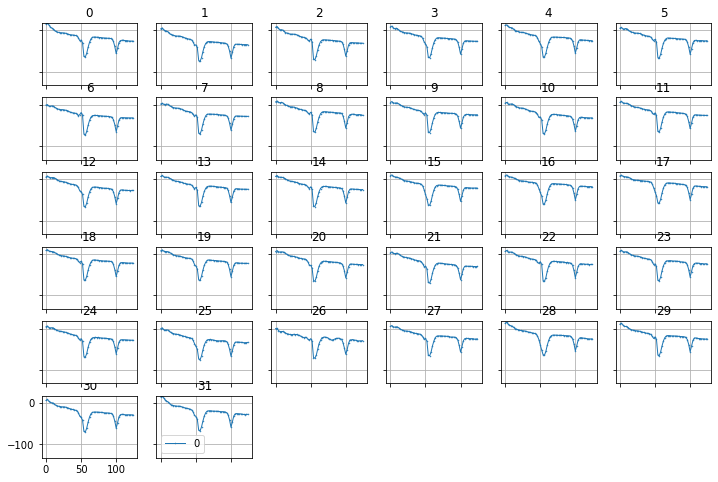

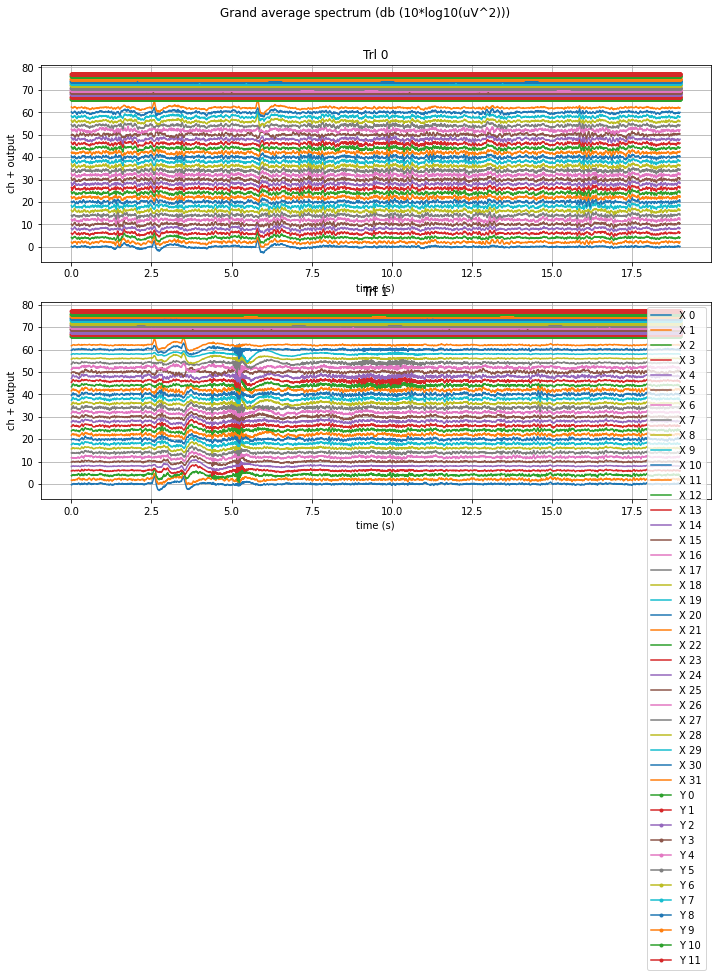

In [125]:
# Plot the grand average spectrum to get idea of the signal quality
plot_grand_average_spectrum(X, fs=coords[1]['fs'], ch_names=coords[-1]['coords'], log=True)
plot_trial(X[-2:,...], Y[-2:,...], fs=coords[1]['fs'])

In [126]:
# work from copy of the loaded data, to so can modify it in-place in the processing
X = oX.copy()
Y = oY.copy()
coords = copy.deepcopy(ocoords)
fs = coords[1]['fs']
ch_names = coords[2]['coords']
# output is: X=eeg, Y=stimulus, coords=meta-info about dimensions of X and Y
print("EEG: X({}){} @{}Hz {}".format([c['name'] for c in coords],X.shape,fs,ch_names))                            
print("STIMULUS: Y({}){}".format([c['name'] for c in coords[:-1]]+['output'],Y.shape))

EEG: X(['trial', 'time', 'channel'])(30, 4750, 32) @250.0Hz ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
STIMULUS: Y(['trial', 'time', 'output'])(30, 4750, 13)


In [127]:
fs_out=100
pipeline=[
    ['MetaInfoAdder',{'info':{'fs':fs, 'ch_names':ch_names}}],
    ['ButterFilterAndResampler',{'filterband':[3,25,'bandpass'], 'fs_out':fs_out}],
    ['TargetEncoder',{'evtlabs':('re')}],
    ['MultiCCA',{'tau_ms':450,'rank':1}],
]

In [128]:
ppp = make_preprocess_pipeline(pipeline)
print(ppp)

PreprocessPipeline(stages=[('metainfoadder',
                            MetaInfoAdder(info={'ch_names': ['0', '1', '2', '3',
                                                             '4', '5', '6', '7',
                                                             '8', '9', '10',
                                                             '11', '12', '13',
                                                             '14', '15', '16',
                                                             '17', '18', '19',
                                                             '20', '21', '22',
                                                             '23', '24', '25',
                                                             '26', '27', '28',
                                                             '29', ...],
                                                'fs': 250.0})),
                           ('butterfilterandresampler',
                            ButterFilterAndResamp

In [129]:
ppp.fit(X.copy(),Y.copy())

c:\users\developer\desktop\private\mindaffectBCI\decoder\multipleCCA.py:281: UserWarning: Degenerate C matrices input!
  warnings.warn('Degenerate C matrices input!')


PreprocessPipeline(stages=[('metainfoadder',
                            MetaInfoAdder(info={'ch_names': ['0', '1', '2', '3',
                                                             '4', '5', '6', '7',
                                                             '8', '9', '10',
                                                             '11', '12', '13',
                                                             '14', '15', '16',
                                                             '17', '18', '19',
                                                             '20', '21', '22',
                                                             '23', '24', '25',
                                                             '26', '27', '28',
                                                             '29', ...],
                                                'fs': 250.0})),
                           ('butterfilterandresampler',
                            ButterFilterAndResamp

To visualize the final fitted model, we extract the last pipeline stage, with `ppp.stages[-1]`, the the estimator object as the 2nd slot of the tuple, and then ask the estimator object to plot itself with:

Plot Factored Model
A=(1, 32) R=(1, 1, 45)
trying to get pos from cap file!


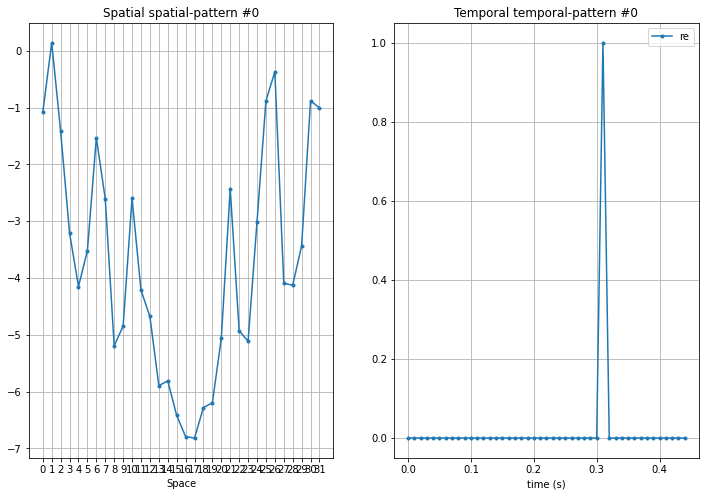

In [130]:
clsfr = ppp.stages[-1]
ppp.stages[-1][1].plot_model(fs=fs_out,ch_names=ch_names,plot_pattern=True)

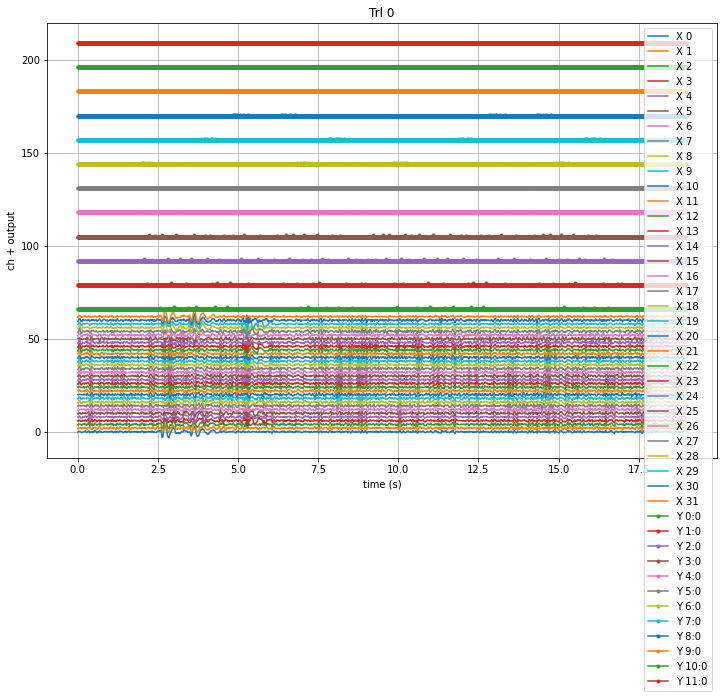

In [131]:
Xpp, Ypp = ppp.modify(X,Y, until_stage=-1)
plot_trial(Xpp[-1:,...],Ypp[-1:,...],fs=100)

In [132]:
print(ppp.stages[-1][1])
dc = ppp.stages[-1][1].plot_decoding_curve(Xpp,Ypp,cv=5,nvirt_out=-20)

MultiCCA(tau_ms=450)


c:\users\developer\desktop\private\mindaffectBCI\decoder\multipleCCA.py:281: UserWarning: Degenerate C matrices input!
  warnings.warn('Degenerate C matrices input!')
c:\users\developer\desktop\private\mindaffectBCI\decoder\model_fitting.py:506: RuntimeWarning: invalid value encountered in long_scalars
  score = np.sum(Yi == 0)/Yi.size # total amount time was right, higher=better


ValueError: attempt to get argmax of an empty sequence

## Per-object analysis

In [149]:
fs_out=100
ch_names = ["Fp1","Fz","F3","F7","F9","FC5","FC1","C3","T7","CP5","CP1","Pz","P3","P7","P9","O1","Oz","O2","P10","P8","P4","CP2","CP6","T8","C4","Cz","FC2","FC6","F10","F8","F4","Fp2"]
pipeline=[
    ['MetaInfoAdder',{'info':{'fs':fs, 'ch_names':ch_names}}],
    ['ButterFilterAndResampler',{'filterband':[5,25,'bandpass'], 'fs_out':fs_out}],
    ['NoiseSubspaceDecorrelator',{'ch_names':['Fp1','Fp2','F9','F10']}],
    ['TargetEncoder',{'evtlabs':('hoton_re')}],
    ['MultiCCA',{'tau_ms':350,'rank':1}],
]

Plot Factored Model
A=(1, 32) R=(1, 6, 35)
trying to get pos from cap file!


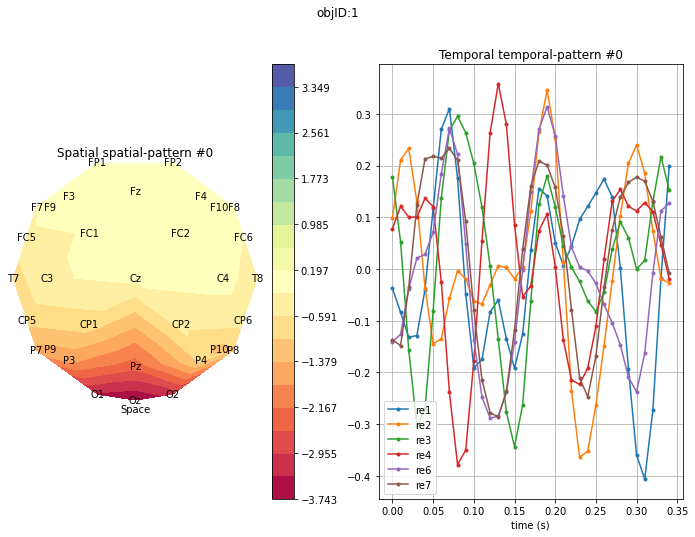

Plot Factored Model
A=(1, 32) R=(1, 7, 35)
trying to get pos from cap file!


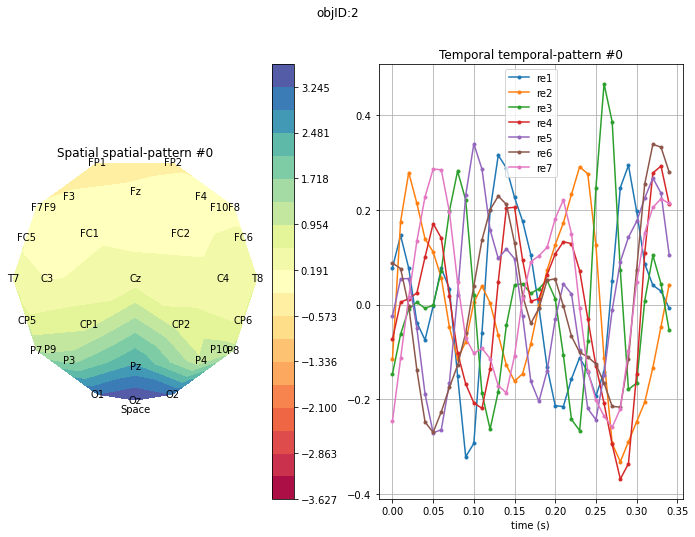

Plot Factored Model
A=(1, 32) R=(1, 7, 35)
trying to get pos from cap file!


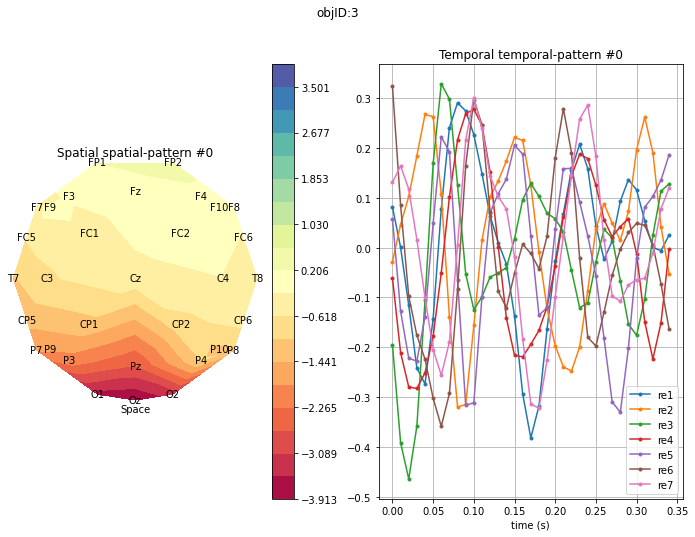

Plot Factored Model
A=(1, 32) R=(1, 7, 35)
trying to get pos from cap file!


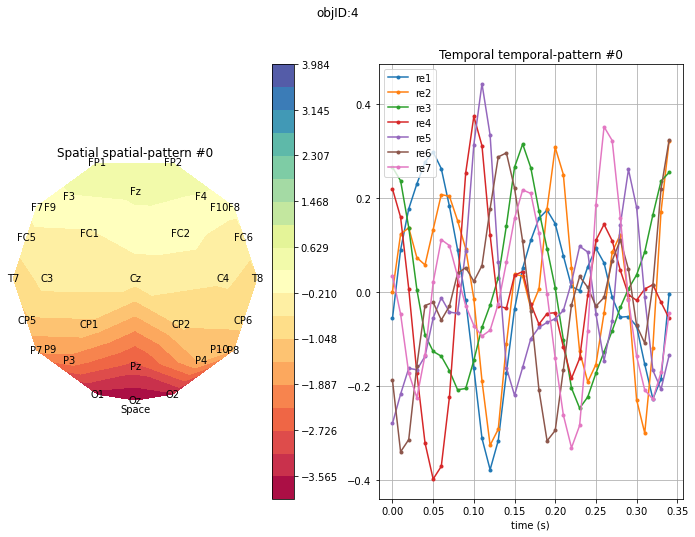

Plot Factored Model
A=(1, 32) R=(1, 2, 35)
trying to get pos from cap file!


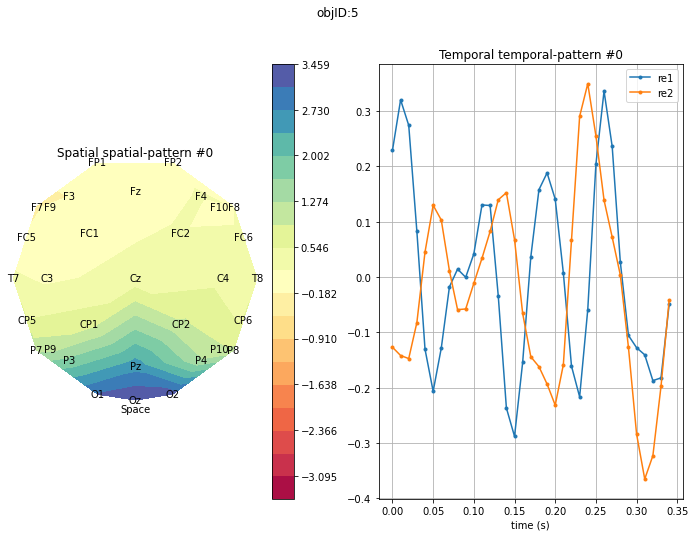

Plot Factored Model
A=(1, 32) R=(1, 2, 35)
trying to get pos from cap file!


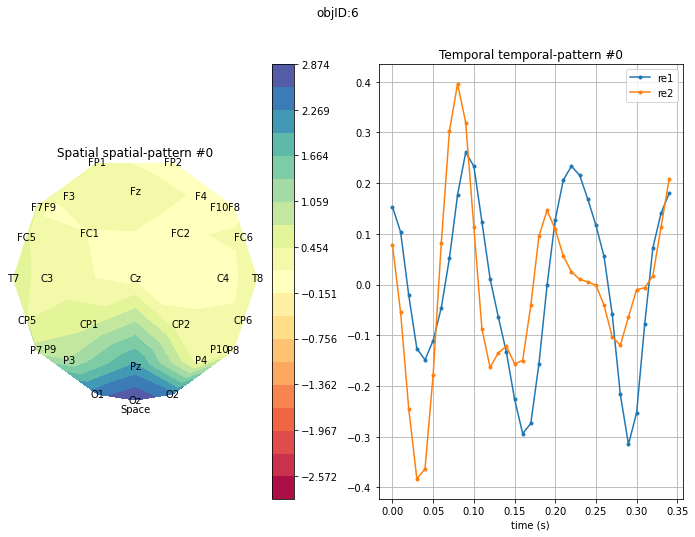

Plot Factored Model
A=(1, 32) R=(1, 2, 35)
trying to get pos from cap file!


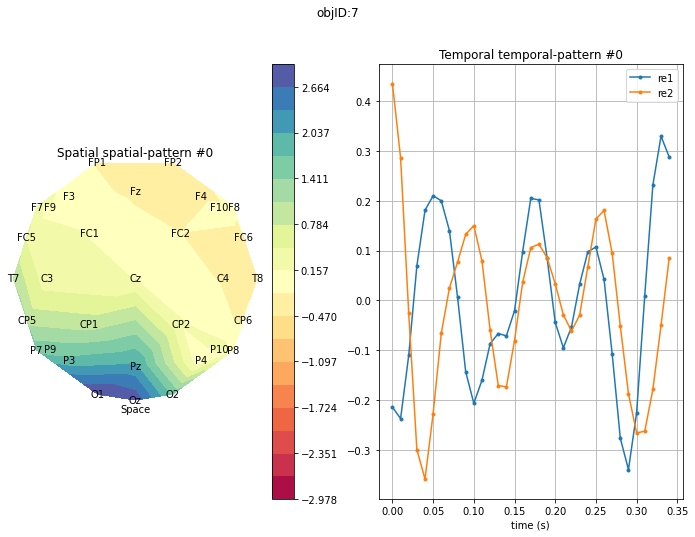

Plot Factored Model
A=(1, 32) R=(1, 2, 35)
trying to get pos from cap file!


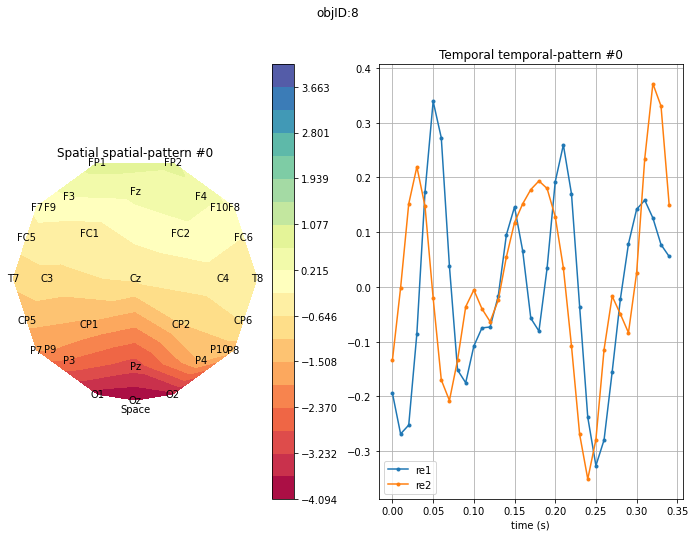

Plot Factored Model
A=(1, 32) R=(1, 2, 35)
trying to get pos from cap file!


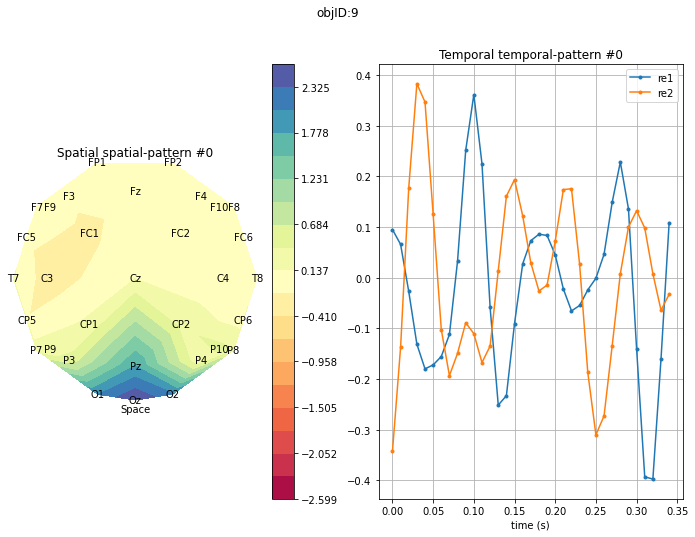

Plot Factored Model
A=(1, 32) R=(1, 2, 35)
trying to get pos from cap file!


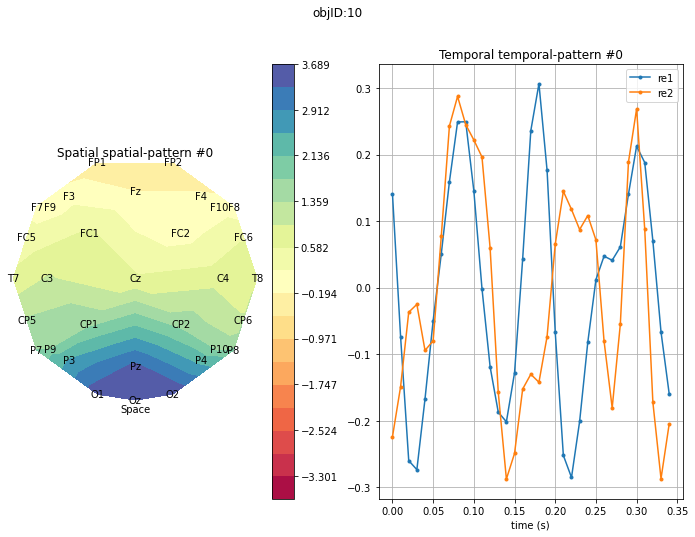

Plot Factored Model
A=(1, 32) R=(1, 2, 35)
trying to get pos from cap file!


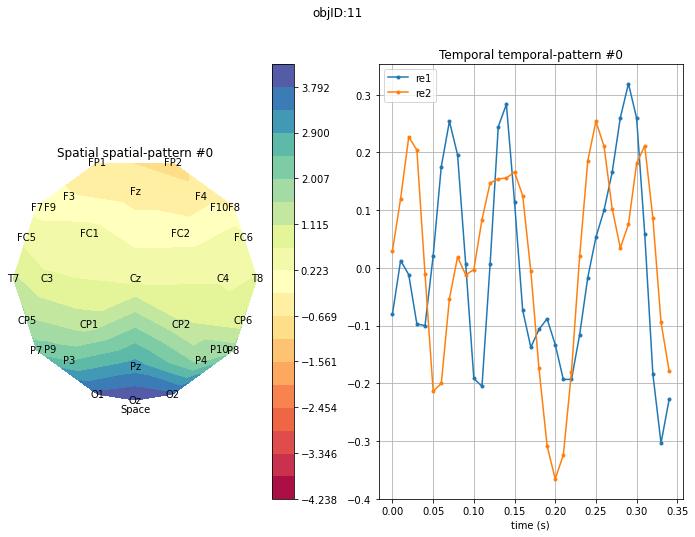

Plot Factored Model
A=(1, 32) R=(1, 2, 35)
trying to get pos from cap file!


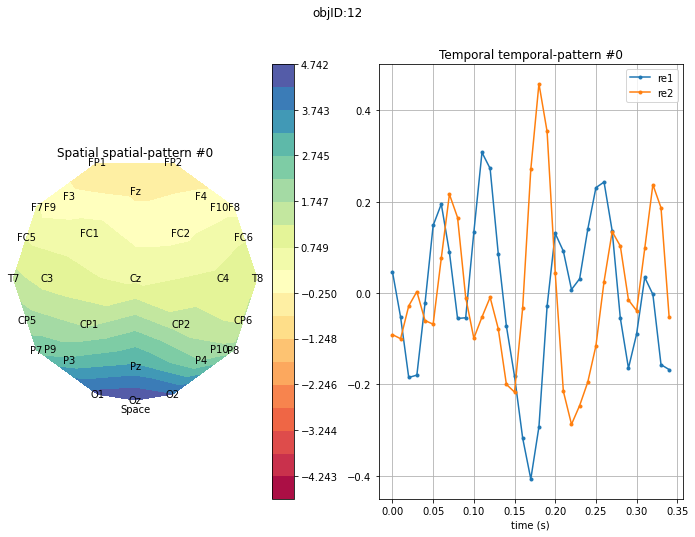

In [150]:

for objID in range(1,Y.shape[-1]):
    ppp = make_preprocess_pipeline(pipeline)
    ppp.fit(X.copy(),Y[...,[objID]].copy())
    clsfr = ppp.stages[-1][1]
    clsfr.plot_model(fs=fs_out,ch_names=ch_names,plot_pattern=True)
    plt.suptitle("objID:{}".format(objID))
    plt.show()
    #Xpp, Ypp = ppp.modify(X,Y, until_stage=-1)
    #clsfr.plot_decoding_curve(Xpp,Ypp,cv=5,nvirt_out=-20)

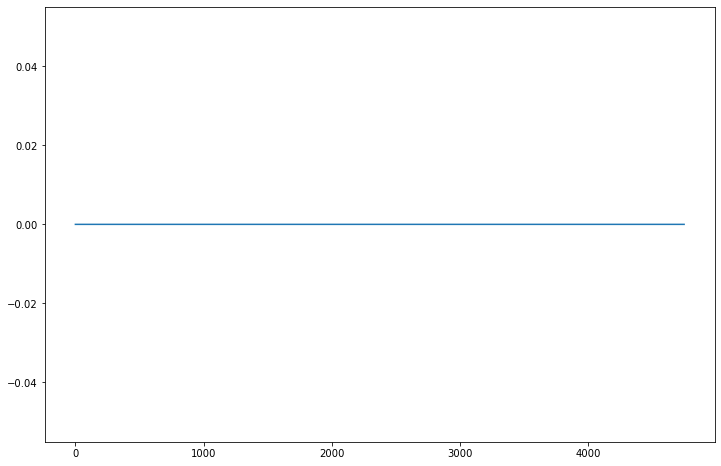